In [80]:
from pathlib import Path

from matplotlib.colors import cnames
from scipy import io
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler as scaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from skimage import feature
import cv2
from sklearn.metrics import mean_squared_error as mse

In [28]:
IMG = Path('./img/canny')
IMG.mkdir(exist_ok=True, parents=True)

In [13]:
img = cv2.imread((IMG / 'pc12.png').as_posix(), 0)
img.shape

(145, 145)

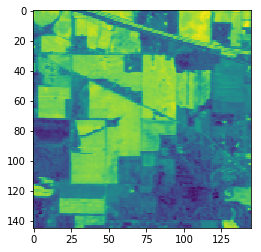

In [14]:
plt.imshow(img)
plt.show()

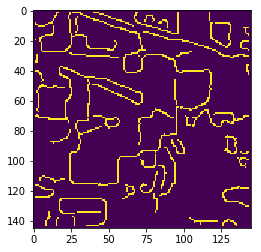

In [32]:
c1 = feature.canny(img, sigma=1.9, low_threshold=10)
plt.imshow(c1)
plt.show()

In [138]:
def prepare():
    for sigma in np.linspace(.1, 2, 20):
        for low_threshold in np.arange(.1, 1., .05):
            for high_threshold in np.arange(.1, 1., .05):
                yield {
                    'sigma': sigma,
                    'low_threshold': low_threshold,
                    'high_threshold': high_threshold,
                }
len(list(prepare()))

6480

In [139]:
def d2s(d):
    return '-'.join([f'{k}_{v}' for k,v in d.items()])

In [140]:
n = len(list(prepare()))
ns = len(str(n))
cannies = []
for i, v in enumerate(prepare()):
    s = d2s(v)
    if i % 1000 == 999:
        print(f'{i:0>{ns}}/{n}', s)
    c = feature.canny(img, **v, use_quantiles=True).astype(np.int8)
    if 2300 < c.sum() < 2500:
        cannies.append((c, s))
        plt.imsave(IMG / f'{i:0>{ns}}_{s}.png', c)

0999/6480 sigma_0.4-low_threshold_0.15000000000000002-high_threshold_0.5500000000000002
1999/6480 sigma_0.7-low_threshold_0.25000000000000006-high_threshold_0.15000000000000002
2999/6480 sigma_0.9999999999999999-low_threshold_0.30000000000000004-high_threshold_0.6500000000000001
3999/6480 sigma_1.3-low_threshold_0.40000000000000013-high_threshold_0.25000000000000006
4999/6480 sigma_1.5999999999999999-low_threshold_0.45000000000000007-high_threshold_0.7500000000000002
5999/6480 sigma_1.9-low_threshold_0.5500000000000002-high_threshold_0.3500000000000001


In [38]:
d = next(prepare())
d

{'sigma': 0.1,
 'low_threshold': 0.1,
 'high_threshold': 0.1,
 'mask': True,
 'use_quantiles': True}

In [39]:
str(d)

"{'sigma': 0.1, 'low_threshold': 0.1, 'high_threshold': 0.1, 'mask': True, 'use_quantiles': True}"

In [41]:
d2s(d)

'sigma_0.1-low_threshold_0.1-high_threshold_0.1-mask_True-use_quantiles_True'

In [48]:
len(list(prepare()))

16000

In [63]:
len(cannies)

16000

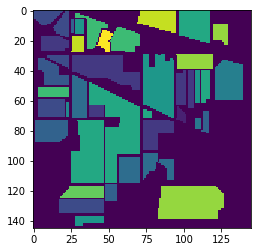

In [145]:
gt = cv2.imread((IMG / '..' / 'gt.png').as_posix(), 0)
plt.imshow(gt)
plt.show()

In [146]:
gt

array([[72, 72, 72, ..., 30, 30, 30],
       [72, 72, 72, ..., 30, 30, 30],
       [72, 72, 72, ..., 30, 30, 30],
       ...,
       [30, 30, 30, ..., 30, 30, 30],
       [30, 30, 30, ..., 30, 30, 30],
       [30, 30, 30, ..., 30, 30, 30]], dtype=uint8)

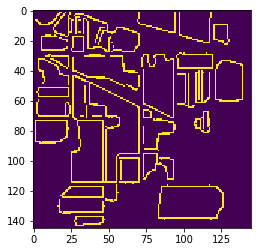

In [87]:
c = feature.canny(gt, sigma=1).astype(int)
plt.imshow(c)
plt.show()

In [141]:
errors = []
for i, (v, s) in enumerate(cannies):
    if i % 100 == 0: print(i)
    errors.append(mse(c, v.astype(int)))

0
100
200


In [142]:
np.array(errors).argmin()

267

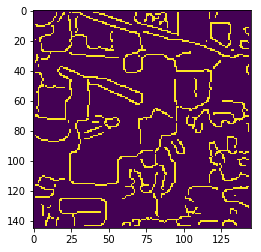

'sigma_2.0-low_threshold_0.15000000000000002-high_threshold_0.6000000000000002'

In [143]:
best, s = cannies[np.array(errors).argmin()]
plt.imshow(best)
plt.show()
s

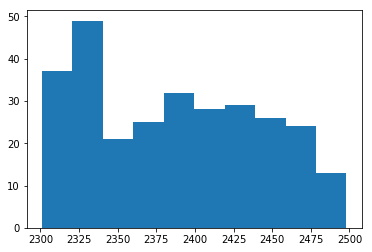

In [144]:
ss = [i.sum() for i,_ in cannies]
plt.hist(ss)
plt.show()

In [104]:
c.sum()

2397

In [126]:
len(cannies)

334